In [21]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
from simulation import *

/Users/robin/Library/Python/3.6/lib/python/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Generating mGraph
----- DONE
Getting layout
----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [37, 25, 31, 41, 43, 44, 1, 22, 0, 2] 
Slist :  [24]


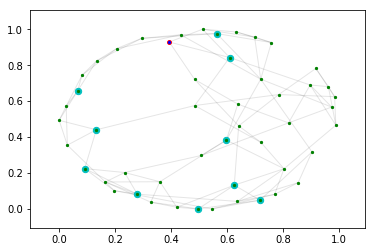

Starting infection


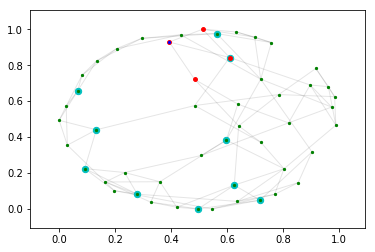

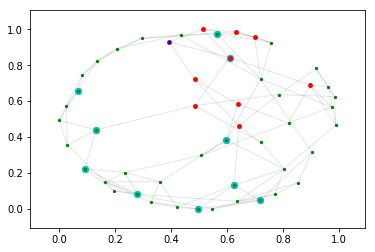

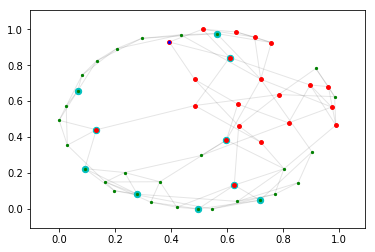

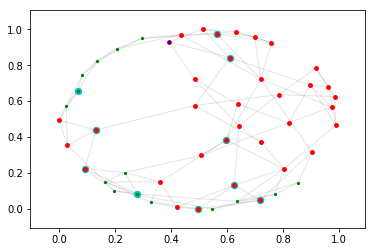

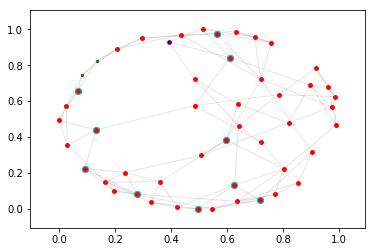

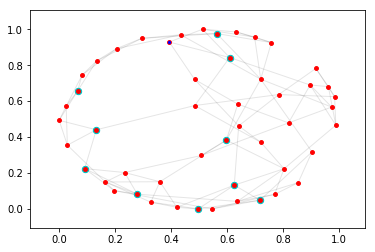

In [26]:
figureList = list()
# Parameters definition
numRumors = 1
maxThreshold = 1
numMonitors = 10
propagProba = 1
numNodes = 50
linkProba = 0.2
monitorTrigger = list()
numStep = 100



Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)


print("Starting infection")
infections = [[] for n in range(numRumors)]

infected = getInfectedList(Graph,numRumors)

j=0

while(len(infected)< len(Graph.nodes())):
    #print("====================================================\n\n\n\n\n\n\n\n====================================================")

    #for i in Graph.nodes():
    #    if i in monitorsList:
    #        print("Node ",str(i),"\t",Graph.node[i])

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1

    #print(monitorTrigger)
    #printMonitorTrig(monitorTrigger)

    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)

In [27]:
sets = list()
for i in range(len(monitorTrigger)):
    set1 =findSet(Graph,monitorTrigger[i][0],monitorTrigger[i][2])
    sets.append(set(set1))
    
source = set.intersection(*sets)

print("Identified Source = ",list(source)[0],"\nReal Source = ",rumorSources[0])

Identified Source =  24 
Real Source =  24
